Importa as bibliotecas que serão utilizadas na execução do código

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from google.colab import files


Carrega a base de dados que será utilizada para o treinamento da IA

In [2]:
uploaded = files.upload()

Saving dados_clientes.csv to dados_clientes.csv


Importa a biblioteca io, que nos permite trabalhar com arquivos, como no caso abaixo onde é realizada a leitura da base de dados carregada

In [3]:
import io
dataset = pd.read_csv(io.BytesIO(uploaded['dados_clientes.csv']))

Imprime as principais informações sobre as variáveis que constituem as colunas da tabela do banco de dados, como quatidade, valores vazios e tipo do dado.

In [4]:
print(dataset.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98872 entries, 0 to 98871
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id_cliente               98872 non-null  object 
 1   idade                    98872 non-null  int64  
 2   genero                   98872 non-null  object 
 3   estado_civil             98872 non-null  object 
 4   tempo_como_cliente       98872 non-null  int64  
 5   tipo_contrato            98872 non-null  object 
 6   forma_pagamento          98872 non-null  object 
 7   suporte_contatado        98872 non-null  int64  
 8   chamados_abertos         98872 non-null  int64  
 9   tempo_medio_atendimento  98872 non-null  float64
 10  reclamacoes              98872 non-null  int64  
 11  atrasos_pagamento        98872 non-null  int64  
 12  renda_faixa              98872 non-null  object 
 13  servicos_assinados       98872 non-null  int64  
 14  produtos_assinados    

Imprime a descrição dos dados, como quantidade, valor máximo e mínimo, valor médio...

In [5]:
print(dataset.describe())


              idade  tempo_como_cliente  suporte_contatado  chamados_abertos  \
count  98872.000000        98872.000000       98872.000000      98872.000000   
mean      39.512228           60.366868           2.001315          0.993911   
std       10.011932           34.714797           1.413176          0.995506   
min       -4.000000            1.000000           0.000000          0.000000   
25%       33.000000           30.000000           1.000000          0.000000   
50%       40.000000           60.000000           2.000000          1.000000   
75%       46.000000           91.000000           3.000000          2.000000   
max       84.000000          120.000000          10.000000          8.000000   

       tempo_medio_atendimento   reclamacoes  atrasos_pagamento  \
count             98872.000000  98872.000000       98872.000000   
mean                 17.554497      0.500617           2.006210   
std                   7.207768      0.707253           1.412597   
min        

Imprime a quantidade de elementos da última variável (coluna) que se encontram com valor igual a 0 ou 1.

In [6]:
print(dataset['churn'].value_counts(normalize=True))

churn
0    0.663039
1    0.336961
Name: proportion, dtype: float64


Separar os valores que serão encontrados em cada parâmetro (x, y). De modo que, X será utilizado para expressar o valor da variável a ser calculada. E Y irá representar todas as outras variáveis, as quais iremos analisar a interferência e correlação com a variável X. Ao determinarmos os valores de Y, removemos o valor das variáveis 'churn' e 'id_cliente', pois a primeira resultaria sempre em uma relação um para um e a segunda não possui valor para análise, visto que expressa um id para cada usuário.

In [7]:
X = dataset.drop(['churn', 'id_cliente'], axis=1)
y = dataset['churn']

Dividimos as variáveis entre colunas com valores do tipo numérica e colunas que possuem alguma categoria como valor; para que possamos analisar e converter esses dados se necessário.

In [8]:
num_cols = X.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X.select_dtypes(include=['object', 'bool']).columns

Realiza o tratamento dos dados numéricos, preechendo os valores nulos, com a média dos valores da coluna; e normalizando os dados (deixando-os na mesma escala).

In [9]:
numeric_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

Realiza o tratamento dos dados categóricos, preenchendo os valores nulos com o valor que mais aparece; e tranformado as categorias em valore binário (0 ou 1).

In [10]:
categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

Aplica o tratamento para dados numéricos e categóricos e junta os dois grupos em um só, para análise.

In [11]:
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_pipeline, num_cols),
    ('cat', categorical_pipeline, cat_cols)
])


Realiza a divisão dos dados, para que sejam criados dois grupos, um para treinamento e outro para teste.

In [12]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

Cria um pipeline, aplicando a técnica de Regressão Logística, aos dados já processados, definindo o seu número máximo de iterações.

In [13]:
pipeline_lr = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

Cria um pipeline, aplicando a técnica de Random Forest, aos dados já processados, definindo o número de árvores que o modelo deve utilizar em seu treinamento.

In [14]:
pipeline_rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

Realiza o treinamamento com os dados separados anteriormente.

In [15]:
pipeline_lr.fit(X_train, y_train)
pipeline_rf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['idade', 'tempo_como_cliente', 'suporte_contatado', 'chamados_abertos',
       'tempo_medio_atendimento', 'reclamacoes', 'atrasos_pagamento',
       'servicos_assinados', 'valor_mensal', 'total_gasto'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['genero', 'estado_civil', 'tipo_contrato', 'forma_pagamento',
       'renda_faixa', 'produtos_assinados'],
      dtype='object'))])),
                ('classifier', RandomForestClassifier(random_state=42))])

Realiza a previsão dos dados de testes. Exibindo os valores de Acurácia, proporção de acertos; Relatório de classificação, valores de precisão, recall, f1-score; e Matriz de confusão, comparação entre os valores reais e os previstos.
Além disso, cria um array 'accuracies' que irá guardar o nome da técnica utilizada e uma variável 'acc' que irá guardar o valor de acurácia de cada uma delas, para que esses valores possam ser comparados futuramente.

In [16]:
accuracies = {}

for name, model in zip(['Regressão Logística', 'Random Forest'], [pipeline_lr, pipeline_rf]):
    y_pred = model.predict(X_val)
    acc = accuracy_score(y_val, y_pred)
    accuracies[name] = acc  # Guardando a acurácia
    print(f"\n{name}")
    print("Acurácia:", acc)
    print("Relatório de Classificação:\n", classification_report(y_val, y_pred))
    print("Matriz de Confusão:\n", confusion_matrix(y_val, y_pred))


Regressão Logística
Acurácia: 0.7198482932996207
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.74      0.89      0.81     13120
           1       0.64      0.39      0.48      6655

    accuracy                           0.72     19775
   macro avg       0.69      0.64      0.65     19775
weighted avg       0.71      0.72      0.70     19775

Matriz de Confusão:
 [[11630  1490]
 [ 4050  2605]]

Random Forest
Acurácia: 0.7184829329962074
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.74      0.89      0.81     13120
           1       0.64      0.38      0.47      6655

    accuracy                           0.72     19775
   macro avg       0.69      0.63      0.64     19775
weighted avg       0.70      0.72      0.70     19775

Matriz de Confusão:
 [[11706  1414]
 [ 4153  2502]]


Acessa a etapa final do pipeline, classifier, para extrair as importâncias dos atributos, destacados na técnica de Random Forest. Exibindo assim, as 10 variáveis mais influentes no modelo.

In [17]:
rf_model = pipeline_rf.named_steps['classifier']
if hasattr(rf_model, 'feature_importances_'):
    importances = rf_model.feature_importances_
    feature_names = pipeline_rf.named_steps['preprocessor'].get_feature_names_out()
    feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)

Cria e apresenta um gráfico ilustrando as 10 variáveis mais ifluentes na previsão.

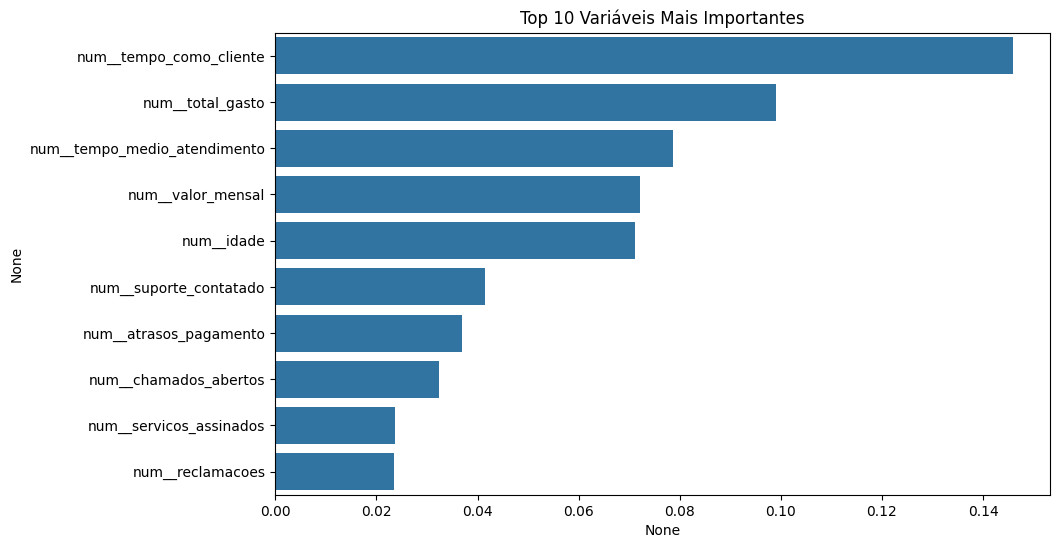

In [18]:
  plt.figure(figsize=(10, 6))
  sns.barplot(x=feat_imp[:10], y=feat_imp.index[:10])
  plt.title("Top 10 Variáveis Mais Importantes")
  plt.show()

Realiza o upload do arquivo da base de dados que será utulizada como teste.

In [19]:
uploaded = files.upload()

Saving desafio.csv to desafio.csv


Faz a leitura dos dados carregados no arquivo 'desaafio.csv'.

In [20]:
dataset_test = pd.read_csv(io.BytesIO(uploaded['desafio.csv']))

Cria uma variável separando apenas a coluna que contêm os valores do Id dos clientes.

In [21]:
ids = dataset_test['id_cliente']

Cria uma variável de teste com as colunas do arquivo que contêm os dados, removendo a coluna de id do cliente

In [22]:
X_test = dataset_test.drop(['id_cliente'], axis=1)

Realiza a previsão dos dados, seguindo a técnica de Radom Forest.

In [23]:
y_pred_test = pipeline_rf.predict(X_test)

Cria variáveis que guardam as técnicas utilizadas, bem como o valor de acurácia que cada uma apresentou.

In [24]:
modelos = list(accuracies.keys())
acuracias = list(accuracies.values())

Cria e aprsenta um gráfico que apresenta uma acomparação entre os valores de acurácia econtrados para cada uma das técnicas testadas. Apresentando uma lógica para aparição dos valores, juntamente com a representação em barras.



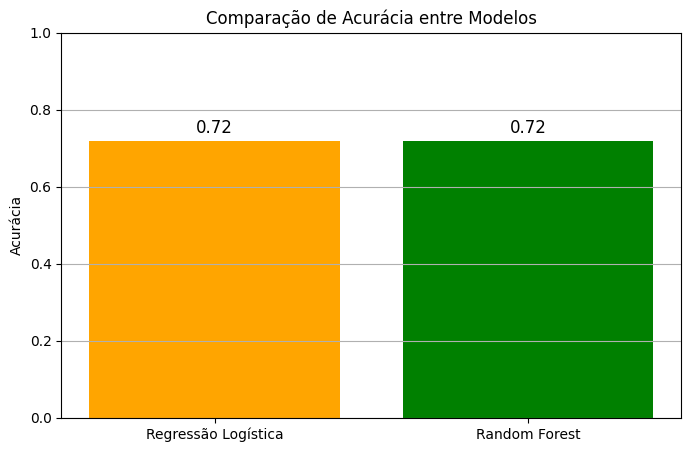

In [25]:


plt.figure(figsize=(8, 5))
plt.bar(modelos, acuracias, color=['orange', 'green'])
plt.ylim(0, 1)
plt.ylabel('Acurácia')
plt.title('Comparação de Acurácia entre Modelos')
plt.grid(axis='y')

for i, acc in enumerate(acuracias):
    plt.text(i, acc + 0.01, f'{acc:.2f}', ha='center', va='bottom', fontsize=12)

plt.show()

Cria um DataFrame com os dados da coluna de id do cliente e os dados previstos para a coluna churn, ou seja, a que determia se o cliente cancelou ou não o serviço.
Além disso, é criado um arquivo em csv com esses dados. E impresso na tela se houve um sucesso nesse processo.

In [27]:
resultado = pd.DataFrame({'id_cliente': ids, 'Target': y_pred_test})
resultado.to_csv('resultado_seunome_seusobrenome.csv', index=False)
print("Arquivo resultado_seunome_seusobrenome.csv salvo com sucesso!")

Arquivo resultado_seunome_seusobrenome.csv salvo com sucesso!
